**Библиотеки Python для DS (семинары в записи)**

Урок 9. Использование на практике методов снижения размерности

Использование алгоритмов понижения размерности для улучшения классификации новостей (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html)

Цель задания: Исследовать влияние различных методов понижения размерности на качество классификации текстовых данных.

Датасет: Набор данных новостных статей
(датасет '20 Newsgroups' доступный в sklearn.datasets).

Задачи:

1. Загрузите датасет '20 Newsgroups' из sklearn.

2. Проведите предобработку данных (очистка текста, удаление стоп-слов, векторизация с использованием TF-IDF).

3. Примените к полученным векторам TF-IDF следующие методы понижения размерности:
— PCA (Principal Component Analysis)
— t-SNE (t-distributed Stochastic Neighbor Embedding)
— UMAP (Uniform Manifold Approximation and Projection).

4. После понижения размерности данных используйте любой метод машинного обучения для классификации новостей по темам.

5. Сравните качество классификации для каждого метода понижения размерности. Используйте метрики точности и F1-меру.

6. Визуализируйте двумерное представление данных для каждого метода понижения размерности, чтобы оценить, как алгоритмы справляются с сепарацией классов.

7. Напишите отчёт, в котором обсудите, какой метод понижения размерности оказал наиболее значительное влияние на качество классификации и почему.


In [1]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.8 MB/s eta 0:00:00


In [2]:
# Библиотека для загрузки датасета
from sklearn.datasets import fetch_20newsgroups
import joblib
# Библиотеки для работы с датасетом и графиками
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import umap
from umap import UMAP
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk
from joblib import Parallel, delayed
# Необходимые ресурсы NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
import umap
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**1. Загрузите датасет '20 Newsgroups' из sklearn.**

In [3]:
# Загрузка датасета
newsgroups_data = fetch_20newsgroups(subset='all')

# Сохранение данных в файл
joblib.dump(newsgroups_data, '20_newsgroups_data.pkl')

# Загрузка данных из файла
newsgroups_data = joblib.load('20_newsgroups_data.pkl')

In [ ]:
# Создание DataFrame, предварительно нужно выбрать вариант загрузки что представлены выше
data = {
    'text': newsgroups_data.data,
    'target': newsgroups_data.target}
df = pd.DataFrame(data)

# Добавление категорий
df['category'] = df['target'].apply(lambda x: newsgroups_data.target_names[x])

# Вывод DataFrame
df

text  target  \
0      From: Mamatha Devineni Ratnam <mr47+@andrew.cm...      10   
1      From: mblawson@midway.ecn.uoknor.edu (Matthew ...       3   
2      From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...      17   
3      From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...       3   
4      From: Alexander Samuel McDiarmid <am2o+@andrew...       4   
...                                                  ...     ...   
18841  From: jim.zisfein@factory.com (Jim Zisfein) \n...      13   
18842  From: rdell@cbnewsf.cb.att.com (richard.b.dell...      12   
18843  From: westes@netcom.com (Will Estes)\nSubject:...       3   
18844  From: steve@hcrlgw (Steven Collins)\nSubject: ...       1   
18845  From: chriss@netcom.com (Chris Silvester)\nSub...       7   

                       category  
0              rec.sport.hockey  
1      comp.sys.ibm.pc.hardware  
2         talk.politics.mideast  
3      comp.sys.ibm.pc.hardware  
4         comp.sys.mac.hardware  
...                         ...  
18841                   sci.med  
18842           sci.electronics  
18843  comp.sys.ibm.pc.hardware  
18844             comp.graphics  
18845                 rec.autos  

[18846 rows x 3 columns]

**2. Проведите предобработку данных (очистка текста, удаление стоп-слов, векторизация с использованием TF-IDF).**

In [ ]:
# Выводим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      18846 non-null  object
 1   target    18846 non-null  int32 
 2   category  18846 non-null  object
dtypes: int32(1), object(2)
memory usage: 368.2+ KB


Из общей информации следует:
1. Всего 3 колоноки, DataFrame содержит 18846 записей, от 0 до 18845
2. Нулевые значения отсуствуют
3. Пропущенные значения отсуствуют
4. Колонка target находятся в целочисленом значении int32
5. Колонки: text и category являются объектами object

In [ ]:
# Статистический анализ числовых переменных
df.describe().T

count      mean       std  min  25%  50%   75%   max
target  18846.0  9.293166  5.562798  0.0  5.0  9.0  14.0  19.0

На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. target (Числовые метки классов/категорий):
- Средние количество меток на уровне 9.00
- Миниманая 0.0
- Максимальная 19.00
- Медиана равна 9.29
- Отклонение состовляет 5.56

In [ ]:
# Статистический анализ объектных признаков
df.describe(include='object').T

count unique                                                top freq
text      18846  18846  From: Mamatha Devineni Ratnam <mr47+@andrew.cm...    1
category  18846     20                                   rec.sport.hockey  999

1. text (Текст сообщения):
- В данных присутствуют записи о поле у 18846 текстов.
- Каждый текст уникален.

2. category (Категория)
- В данных присутствуют записи о поле у 18846 категории.
- В данных присутствует 20 уникальных категорий.
- Категория rec.sport.hockey встречается наиболее часто 999 раз.

In [ ]:
# Проверяем на дубликаты
print('Количество дубликатов:')
print(df.duplicated().sum())

Количество дубликатов:
0


In [ ]:
# Проверка на нулевые значения
df.isnull().sum()

text        0
target      0
category    0
dtype: int64

In [ ]:
# Проверка на NaN значения
df.isnull().any().any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      18846 non-null  object
 1   target    18846 non-null  int32 
 2   category  18846 non-null  object
dtypes: int32(1), object(2)
memory usage: 368.2+ KB


C:\Users\Esdesu\AppData\Local\Temp\ipykernel_14848\853446660.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette='viridis')


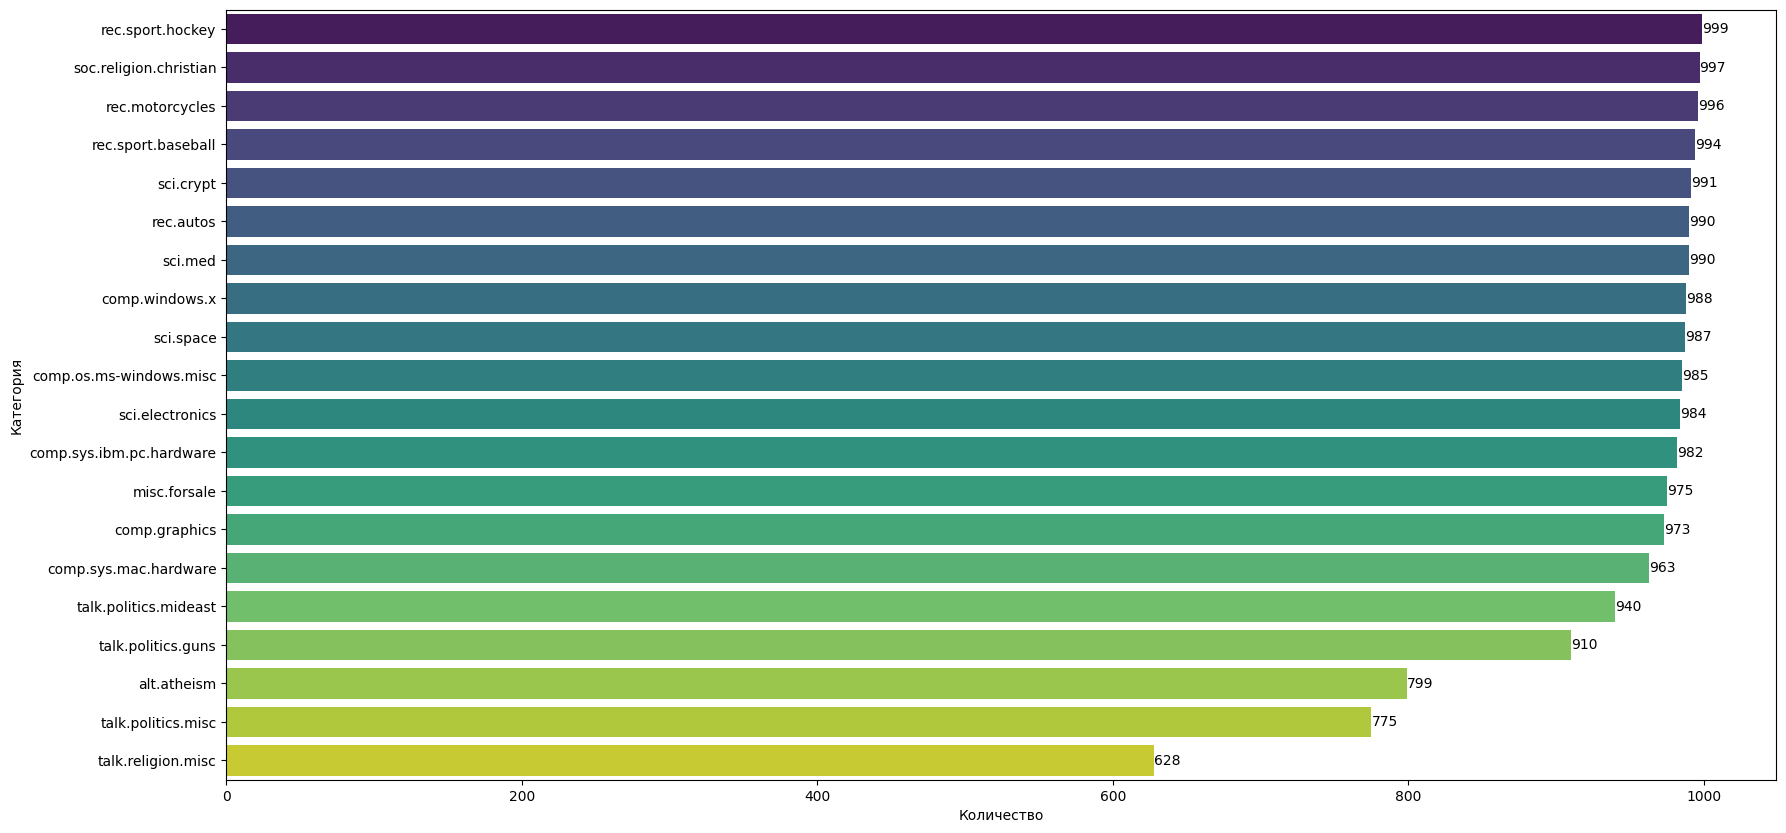

In [ ]:
# Установка размера фигуры
plt.figure(figsize=(20, 10))

# Построение графика с изменениями
sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette='viridis')

# Добавление заголовков
plt.xlabel('Количество')
plt.ylabel('Категория')

# Добавление аннотаций для отображения точных значений
for index, value in enumerate(df['category'].value_counts()):
    plt.text(value, index, str(value), va='center')

# Отображение графика
plt.show()

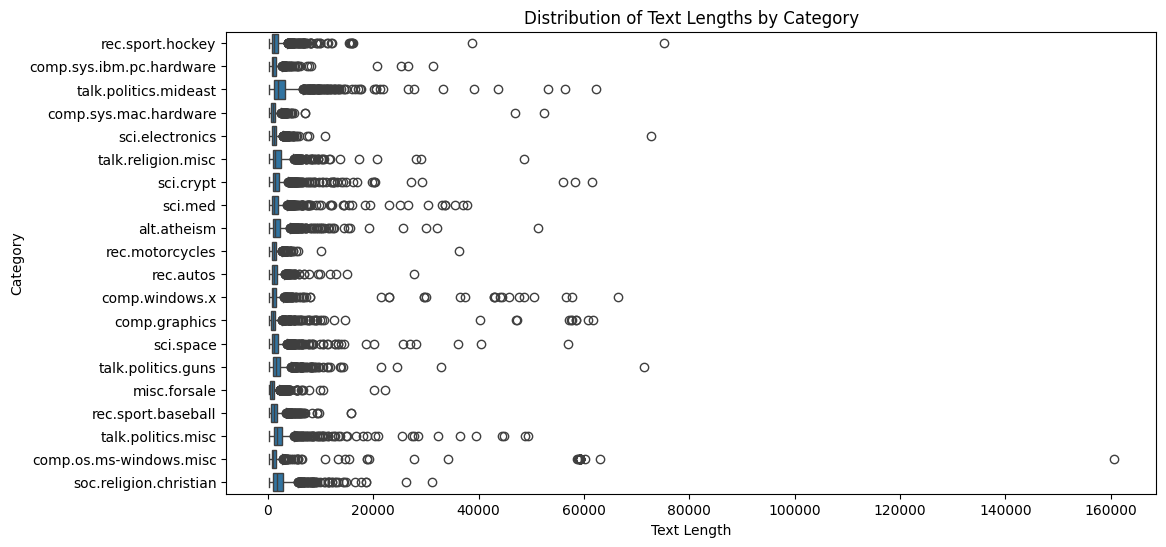

In [ ]:
# Длина текстов в различных категориях
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(y='category', x='text_length', data=df, orient='h')
plt.title('Distribution of Text Lengths by Category')
plt.xlabel('Text Length')
plt.ylabel('Category')
plt.show()

C:\Users\Esdesu\AppData\Local\Temp\ipykernel_14848\2597308334.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='category', x='text_length', data=df, orient='h', palette='viridis')


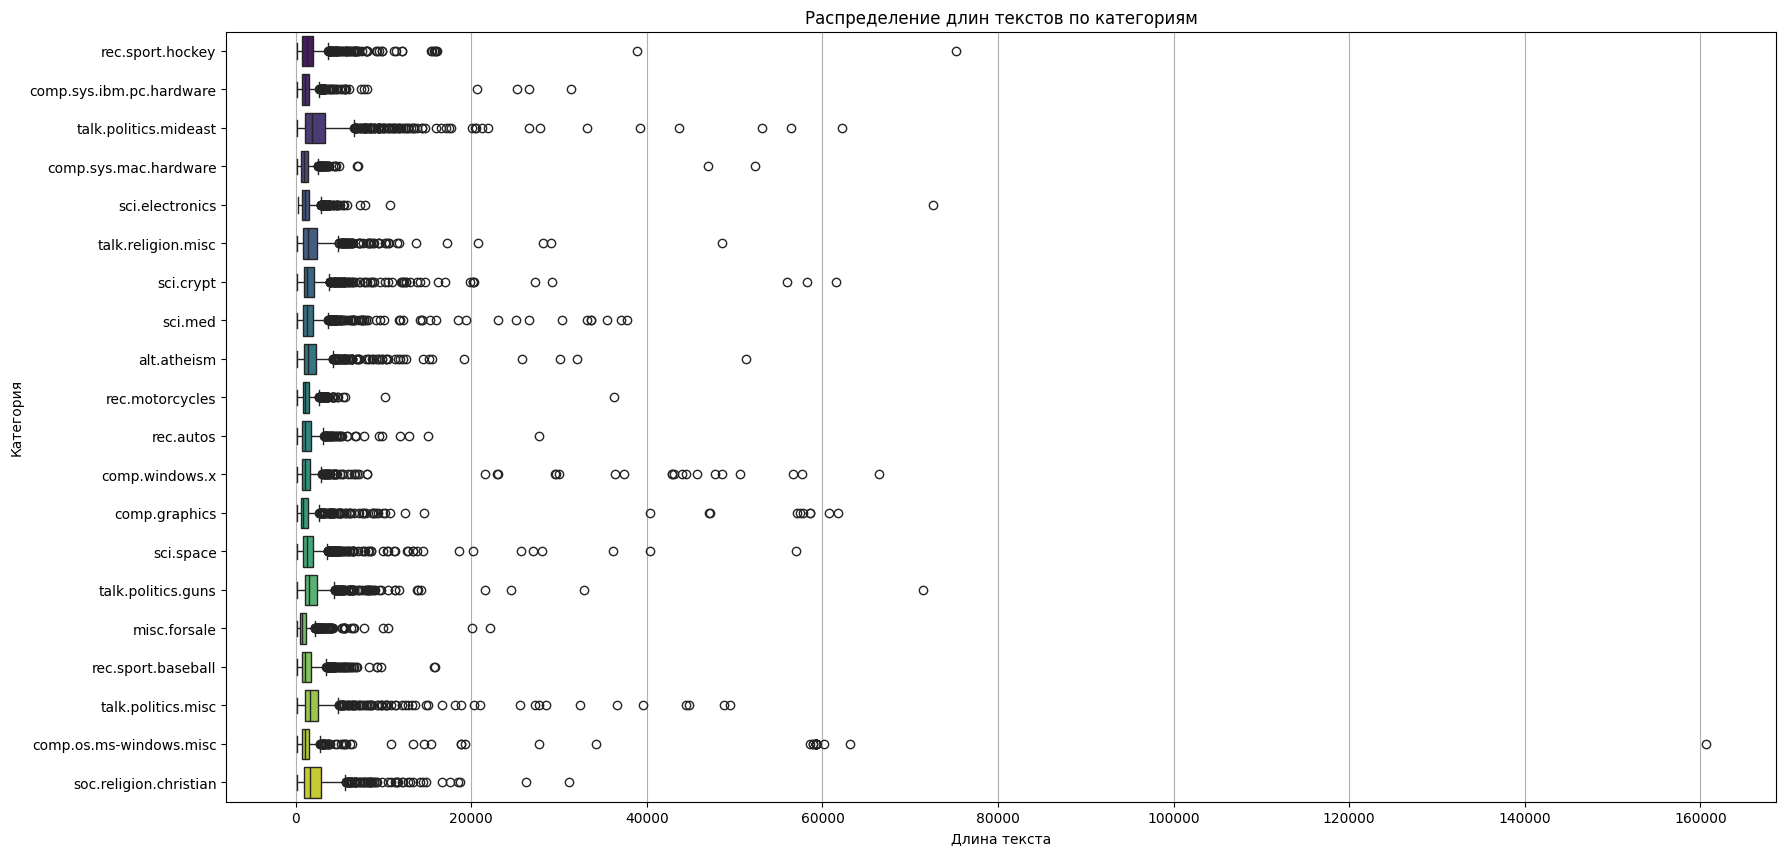

In [ ]:
# Создание нового столбца для длины текстов
df['text_length'] = df['text'].apply(len)

# Установка размера фигуры
plt.figure(figsize=(20, 10))

# Построение графика с изменениями
sns.boxplot(y='category', x='text_length', data=df, orient='h', palette='viridis')

# Добавление заголовков
plt.title('Распределение длин текстов по категориям')
plt.xlabel('Длина текста')
plt.ylabel('Категория')

# Настройка сетки для лучшей читаемости
plt.grid(axis='x')

# Отображение графика
plt.show()


C:\Users\Esdesu\AppData\Local\Temp\ipykernel_14848\208279121.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=word_freq.sort_values(by='frequency', ascending=False), palette='coolwarm')


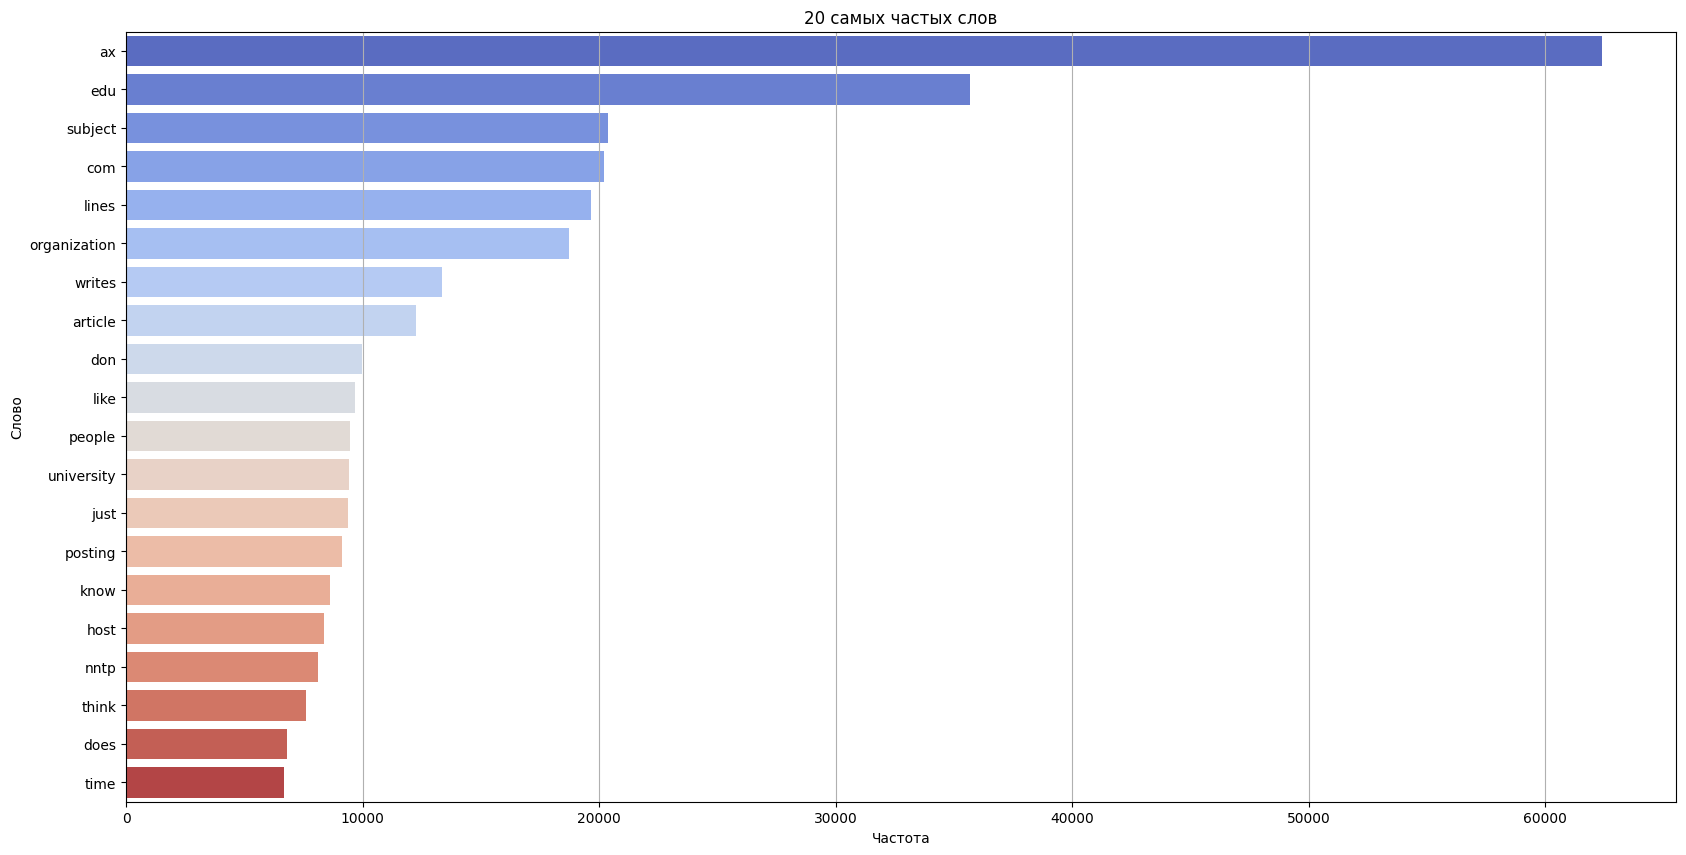

In [ ]:
# Частотный анализ слов
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['text'])

# X.toarray(): Преобразует разреженную матрицу в плотный массив (numpy array), чтобы можно было легко суммировать частоты.
# sum(axis=0): Суммирует частоты слов по всем документам, создавая вектор частот,
# где каждая позиция соответствует суммарной частоте одного слова во всех документах.
# Создание DataFrame для частот слов
word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': X.toarray().sum(axis=0)
})

# Установка размера фигуры
plt.figure(figsize=(20, 10))

# Построение графика с изменениями
sns.barplot(x='frequency', y='word', data=word_freq.sort_values(by='frequency', ascending=False), palette='coolwarm')

# Добавление заголовков
plt.title('20 самых частых слов')
plt.xlabel('Частота')
plt.ylabel('Слово')

# Настройка сетки для лучшей читаемости
plt.grid(axis='x')

c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


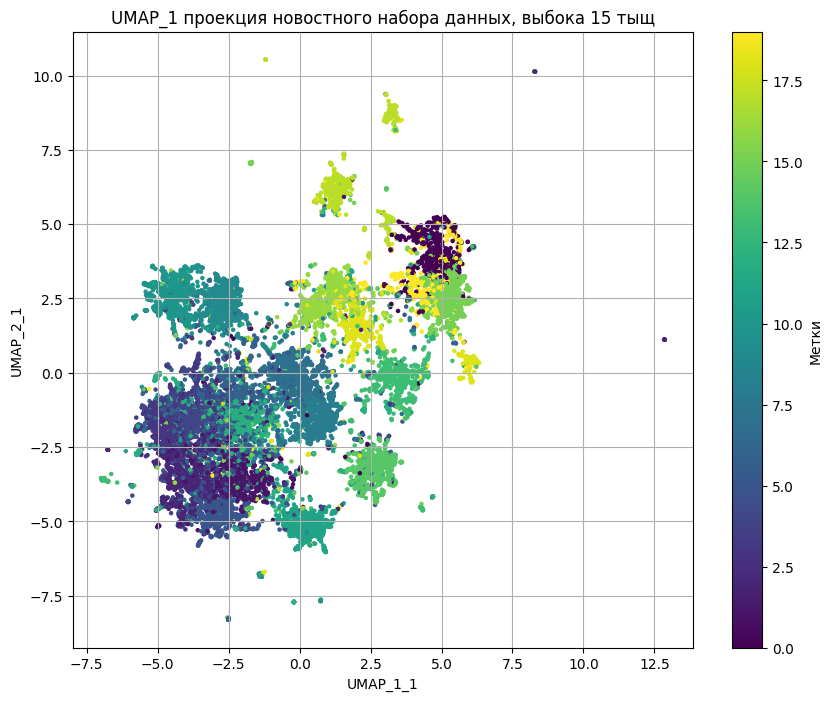

[[0.         0.97793983 0.96172526 0.99619405 0.94455895]
 [0.97793983 0.         0.99476593 0.89607056 0.98455601]
 [0.96172526 0.99476593 0.         0.98918554 0.97788479]
 [0.99619405 0.89607056 0.98918554 0.         0.92826904]
 [0.94455895 0.98455601 0.97788479 0.92826904 0.        ]]


In [ ]:
# Инициализация стоп-слов и лемматизатора
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Применение функции предобработки к текстовым данным
df = pd.DataFrame({'text': newsgroups_data.data, 'label': newsgroups_data.target})

def preprocess(text):
    '''
    Предобработка входного текста: токенизация, удаление пунктуации,
    удаление стоп-слов и лемматизация.
    '''
    # Токенизация текста и перевод в нижний регистр
    words = word_tokenize(text.lower())
    # Удаление пунктуации
    words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]
    # Удаление стоп-слов и фильтрация по алфавиту
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)

# Применение функции предобработки к текстовым данным
df['cleaned_text'] = df['text'].apply(preprocess)

# Векторизация текстовых данных с помощью TF-IDF
vectorizer = TfidfVectorizer(max_features=15_000).fit(df['cleaned_text'])
features_1 = vectorizer.transform(df['cleaned_text'])

# Вычисление косинусных расстояний
cosine_distances_matrix = cosine_distances(features_1)

# Понижение размерности с помощью UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(features_1.toarray())

# Визуализация результатов
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['label'], cmap='viridis', s=5)
plt.colorbar(scatter, label='Метки')
plt.title('UMAP_1 проекция новостного набора данных, выбока 15 тыщ')
plt.xlabel('UMAP_1_1')
plt.ylabel('UMAP_2_1')
plt.grid(True)
plt.show()

# Пример вывода косинусных расстояний для первых 5 векторов
print(cosine_distances_matrix[:5, :5])

c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


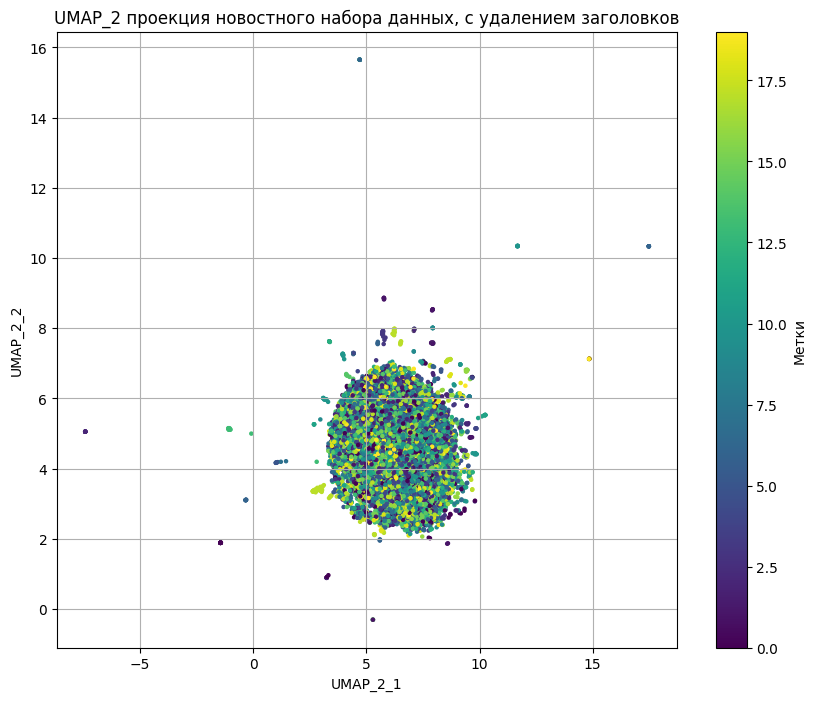

[[0.         0.99167643 0.95734585 1.         1.        ]
 [0.99167643 0.         1.         0.83451053 0.98481586]
 [0.95734585 1.         0.         0.99867233 0.98881003]
 [1.         0.83451053 0.99867233 0.         0.94992837]
 [1.         0.98481586 0.98881003 0.94992837 0.        ]]


In [ ]:
# Инициализация стоп-слов и лемматизатора
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Загрузка данных новостных групп с удалением заголовков, подвалов и цитат
newsgroups_data_2 = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Преобразуем данные в DataFrame
df = pd.DataFrame({'text': newsgroups_data_2.data, 'label': newsgroups_data_2.target})

def preprocess(text):
    '''
    Предобработка входного текста: токенизация, удаление пунктуации,
    удаление стоп-слов и лемматизация.
    '''
    # Токенизация текста и перевод в нижний регистр
    words = word_tokenize(text.lower())
    # Удаление пунктуации
    words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]
    # Удаление стоп-слов и фильтрация по алфавиту
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)

# Применение функции предобработки к текстовым данным
df['cleaned_text'] = df['text'].apply(preprocess)

# Векторизация текстовых данных с помощью TF-IDF
vectorizer = TfidfVectorizer(max_features=15_000).fit(df['cleaned_text'])
features_2 = vectorizer.transform(df['cleaned_text'])

# Вычисление косинусных расстояний
cosine_distances_matrix = cosine_distances(features_2)

# Понижение размерности с помощью UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(features_2.toarray())

# Визуализация результатов
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['label'], cmap='viridis', s=5)
plt.colorbar(scatter, label='Метки')
plt.title('UMAP_2 проекция новостного набора данных, с удалением заголовков')
plt.xlabel('UMAP_2_1')
plt.ylabel('UMAP_2_2')
plt.grid(True)
plt.show()

# Пример вывода косинусных расстояний для первых 5 векторов
print(cosine_distances_matrix[:5, :5])

c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


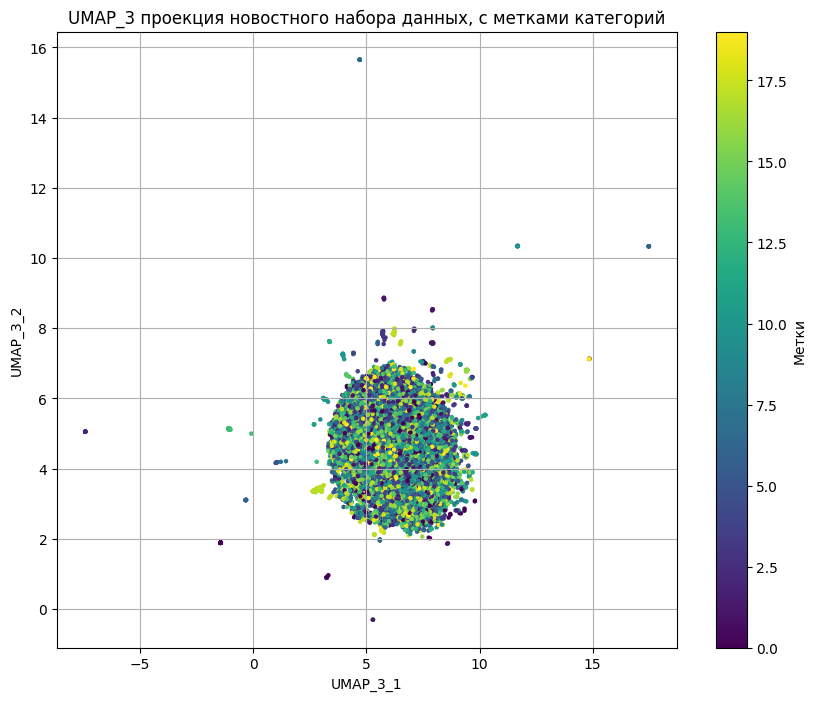

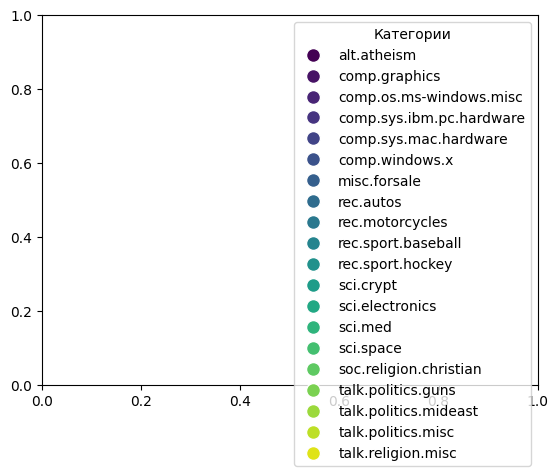

[[0.         0.99167643 0.95734585 1.         1.        ]
 [0.99167643 0.         1.         0.83451053 0.98481586]
 [0.95734585 1.         0.         0.99867233 0.98881003]
 [1.         0.83451053 0.99867233 0.         0.94992837]
 [1.         0.98481586 0.98881003 0.94992837 0.        ]]


In [ ]:

# Инициализация стоп-слов и лемматизатора
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Загрузка данных новостных групп с удалением заголовков, подвалов и цитат
newsgroups_data_3 = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Преобразуем данные в DataFrame
df = pd.DataFrame({'text': newsgroups_data_3.data, 'label': newsgroups_data_3.target})

# Преобразуем числовые метки категорий в строковые названия категорий
category_labels_3 = [newsgroups_data_3.target_names[i] for i in df['label']]

def preprocess(text):
    '''
    Предобработка входного текста: токенизация, удаление пунктуации,
    удаление стоп-слов и лемматизация.
    '''
    # Токенизация текста и перевод в нижний регистр
    words = word_tokenize(text.lower())
    # Удаление пунктуации
    words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]
    # Удаление стоп-слов и фильтрация по алфавиту
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)

# Применение функции предобработки к текстовым данным
df['cleaned_text'] = df['text'].apply(preprocess)

# Векторизация текстовых данных с помощью TF-IDF
vectorizer = TfidfVectorizer(max_features=15_000).fit(df['cleaned_text'])
features_3 = vectorizer.transform(df['cleaned_text'])

# Вычисление косинусных расстояний
cosine_distances_matrix = cosine_distances(features_3)

# Понижение размерности с помощью UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(features_3.toarray())  # Преобразуем features в массив

# Визуализация результатов
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['label'], cmap='viridis', s=5)
plt.colorbar(scatter, label='Метки')
plt.title('UMAP_3 проекция новостного набора данных, с метками категорий')
plt.xlabel('UMAP_3_1')
plt.ylabel('UMAP_3_2')
plt.grid(True)
plt.show()

# Создание легенды
handles = []
for i, category in enumerate(newsgroups_data_3.target_names):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(i / len(newsgroups_data_3.target_names)), markersize=10))
plt.legend(handles, newsgroups_data_3.target_names, title='Категории')
plt.show()

# Пример вывода косинусных расстояний для первых 5 векторов
print(cosine_distances_matrix[:5, :5])

c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


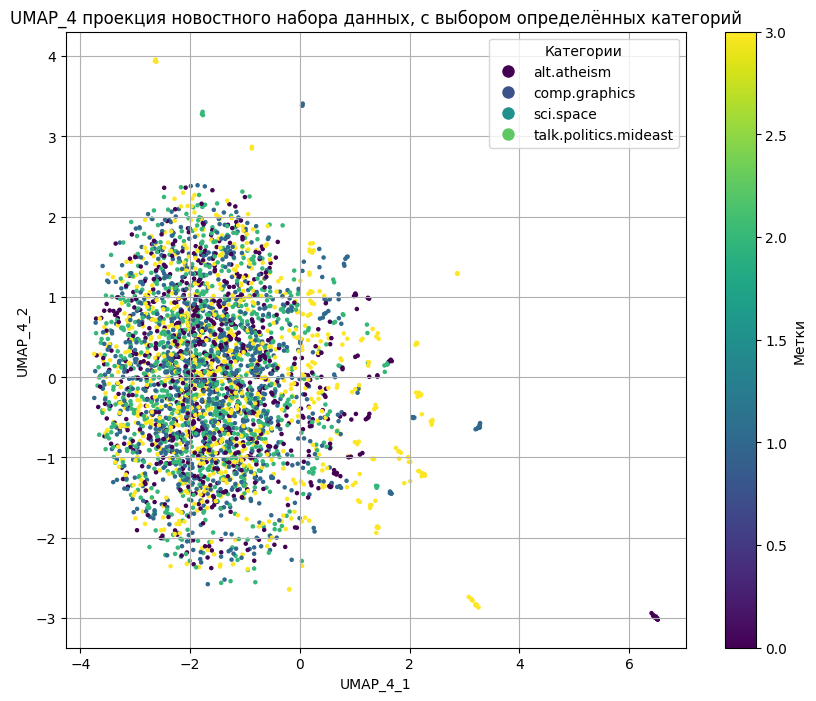

[[0.         1.         1.         1.         1.        ]
 [1.         0.         0.99368169 0.94895174 1.        ]
 [1.         0.99368169 0.         0.99594845 1.        ]
 [1.         0.94895174 0.99594845 0.         0.93274421]
 [1.         1.         1.         0.93274421 0.        ]]


In [ ]:
# Инициализация стоп-слов и лемматизатора
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Выбор определённых категорий
categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.politics.mideast']
# Загрузка данных новостных групп с удалением заголовков, подвалов и цитат
newsgroups_data_4 = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Преобразуем данные в DataFrame
df = pd.DataFrame({'text': newsgroups_data_4.data, 'label': newsgroups_data_4.target})

# Преобразуем числовые метки категорий в строковые названия категорий
category_labels_4 = [newsgroups_data_4.target_names[i] for i in df['label']]

def preprocess(text):
    '''
    Предобработка входного текста: токенизация, удаление пунктуации,
    удаление стоп-слов и лемматизация.
    '''
    # Токенизация текста и перевод в нижний регистр
    words = word_tokenize(text.lower())
    # Удаление пунктуации
    words = [word.translate(str.maketrans('', '', string.punctuation)) for word in words]
    # Удаление стоп-слов и фильтрация по алфавиту
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)

# Применение функции предобработки к текстовым данным
df['cleaned_text'] = df['text'].apply(preprocess)

# Векторизация текстовых данных с помощью TF-IDF
vectorizer = TfidfVectorizer(max_features=15_000).fit(df['cleaned_text'])
features_4 = vectorizer.transform(df['cleaned_text'])

# Вычисление косинусных расстояний
cosine_distances_matrix = cosine_distances(features_4)

# Понижение размерности с помощью UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(features_4.toarray())

# Визуализация результатов
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['label'], cmap='viridis', s=5)
plt.colorbar(scatter, label='Метки')
plt.title('UMAP_4 проекция новостного набора данных, с выбором определённых категорий')
plt.xlabel('UMAP_4_1')
plt.ylabel('UMAP_4_2')
plt.grid(True)

# Добавление легенды для категорий
handles = []
for i, category in enumerate(newsgroups_data_4.target_names):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(i / len(newsgroups_data_4.target_names)), markersize=10))
plt.legend(handles, newsgroups_data_4.target_names, title='Категории')
plt.show()

# Пример вывода косинусных расстояний для первых 5 векторов
print(cosine_distances_matrix[:5, :5])

** 3. Примените к полученным векторам TF-IDF следующие методы понижения размерности:**

* PCA (Principal Component Analysis)

* t-SNE (t-distributed Stochastic Neighbor Embedding)

* UMAP (Uniform Manifold Approximation and Projection).

1. PCA (Principal Component Analysis)

In [ ]:
# PCA метод
pca = PCA(n_components=2)
pca_result_1 = pca.fit_transform(features_1.toarray())

In [ ]:
# Сколько информации сохранено в первых двух компонентах PCA
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
print(f'PCA - Общая объяснительная дисперсия (количество сохраненной информации): {total_explained_variance:.2f}')

PCA - Общая объяснительная дисперсия (количество сохраненной информации): 0.01


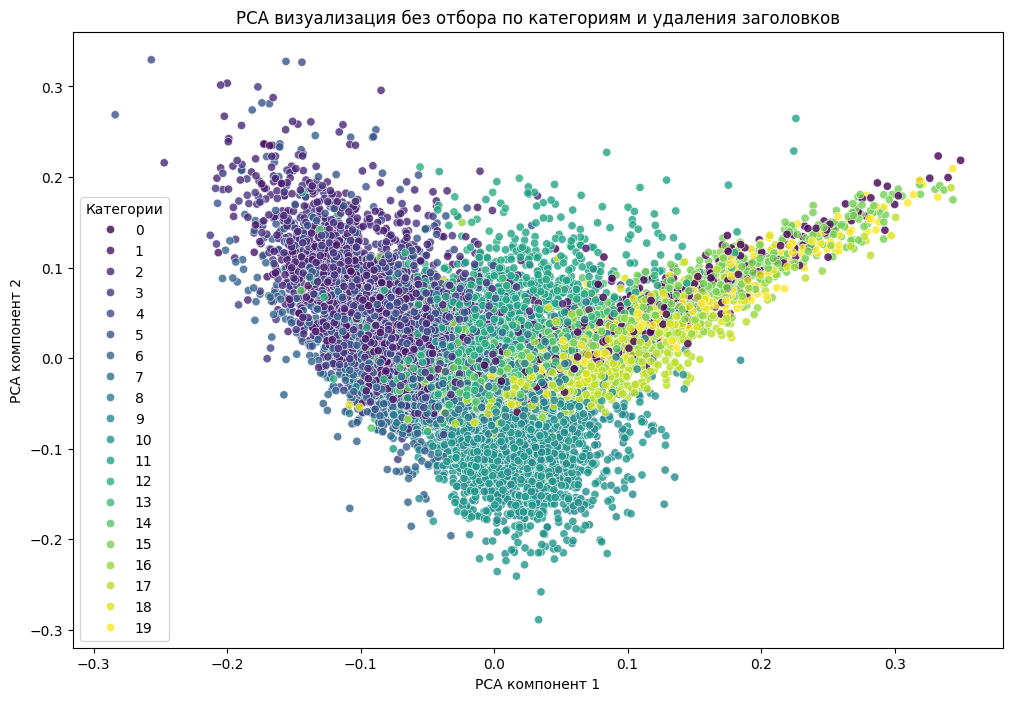

In [ ]:
# Создание графика
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_result_1[:, 0], y=pca_result_1[:, 1], hue=newsgroups_data.target, palette='viridis', legend='full', alpha=0.8)

plt.title('PCA визуализация без отбора по категориям и удаления заголовков')
plt.xlabel('PCA компонент 1')
plt.ylabel('PCA компонент 2')
plt.legend(title='Категории')
plt.show()

PCA - Общая объяснительная дисперсия (количество сохраненной информации): 0.01


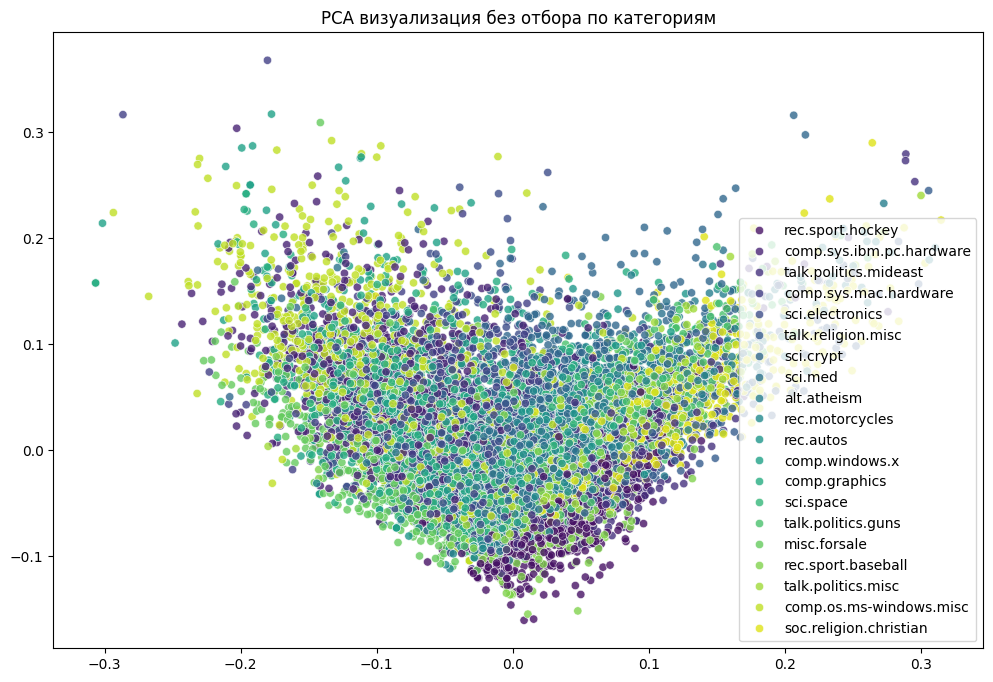

In [ ]:
# PCA метод
pca = PCA(n_components=2)
pca_result_3 = pca.fit_transform(features_3.toarray())

# Сколько информации сохранено в первых двух компонентах PCA
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
print(f'PCA - Общая объяснительная дисперсия (количество сохраненной информации): {total_explained_variance:.2f}')

# Создание графика
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_result_3[:, 0], y=pca_result_3[:, 1], hue=category_labels_3, palette='viridis', legend='full', alpha=0.8)
plt.title('PCA визуализация без отбора по категориям')
plt.show()


PCA - Общая объяснительная дисперсия (количество сохраненной информации): 0.01


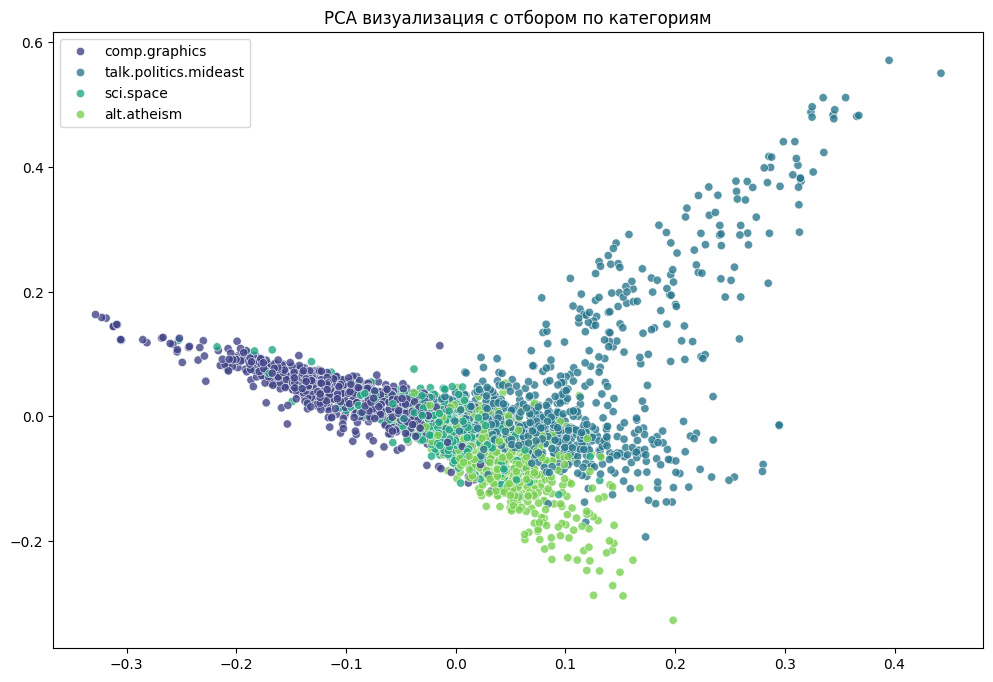

In [ ]:
# PCA метод
pca = PCA(n_components=2)
pca_result_4 = pca.fit_transform(features_4.toarray())

# Сколько информации сохранено в первых двух компонентах PCA
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
print(f'PCA - Общая объяснительная дисперсия (количество сохраненной информации): {total_explained_variance:.2f}')

# Создание графика
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_result_4[:, 0], y=pca_result_4[:, 1], hue=category_labels_4, palette='viridis', legend='full', alpha=0.8)
plt.title('PCA визуализация с отбором по категориям')
plt.show()

2. t-SNE (t-distributed Stochastic Neighbor Embedding)

In [ ]:
# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result_1 = tsne.fit_transform(features_1.toarray())

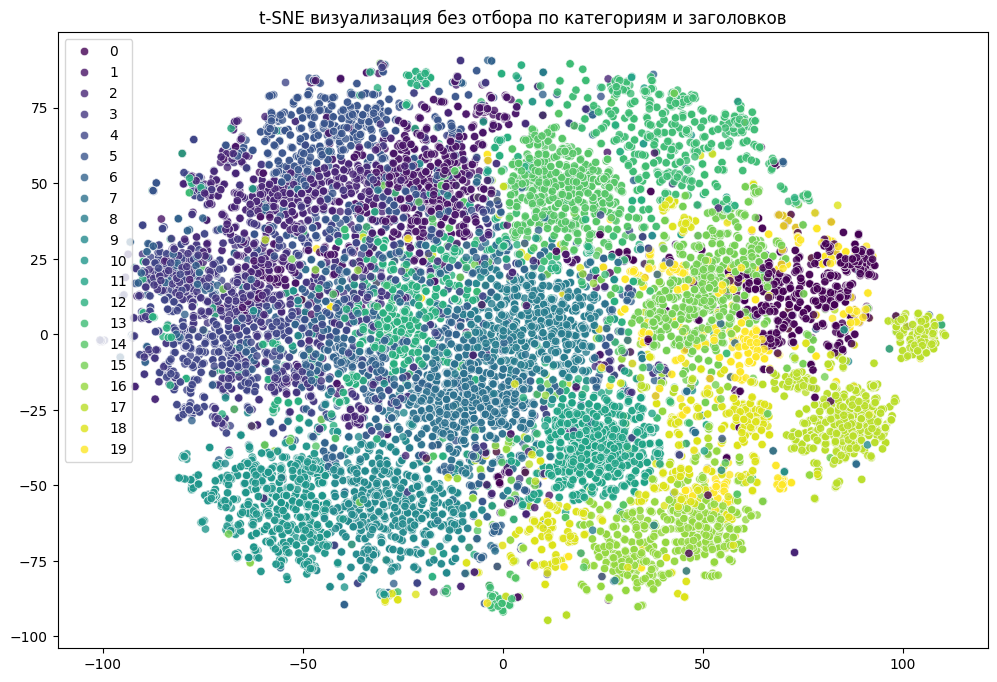

In [ ]:
# Создание графика
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_result_1[:, 0], y=tsne_result_1[:, 1], hue=newsgroups_data.target, palette='viridis', legend='full', alpha=0.8)
plt.title('t-SNE визуализация без отбора по категориям и заголовков')
plt.show()

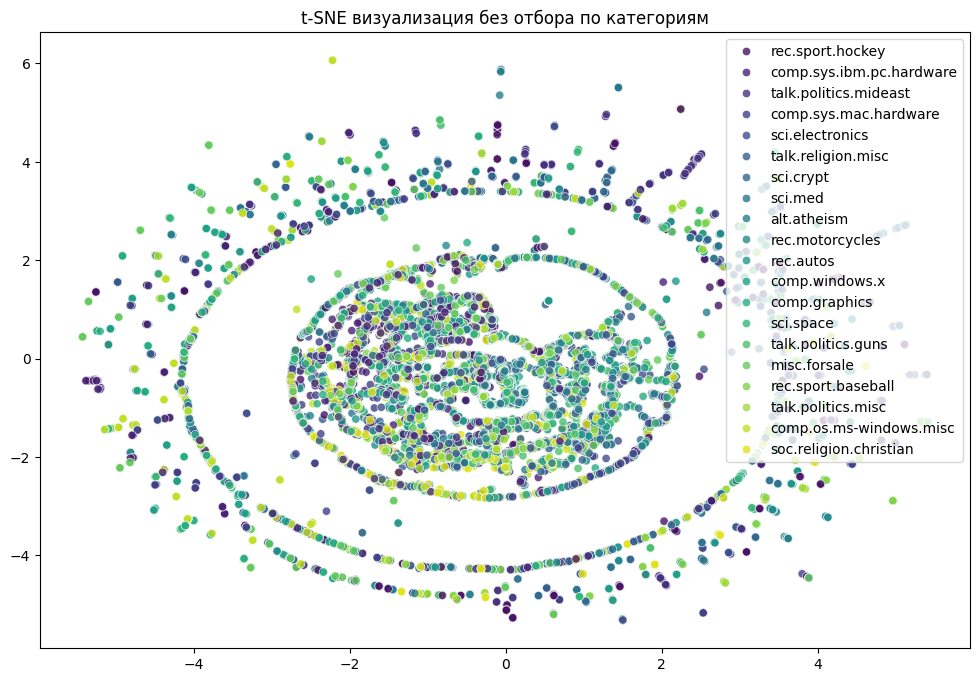

In [ ]:
# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result_3 = tsne.fit_transform(features_3.toarray())

# Создание графика
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_result_3[:, 0], y=tsne_result_3[:, 1], hue=category_labels_3, palette='viridis', legend='full', alpha=0.8)
plt.title('t-SNE визуализация без отбора по категориям')
plt.show()

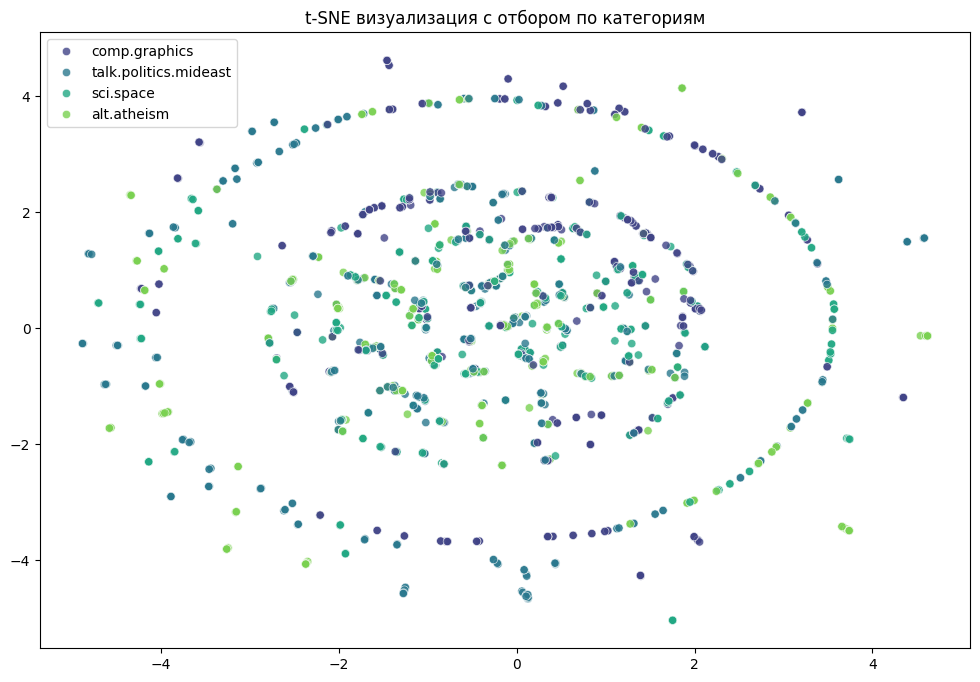

In [ ]:
# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result_4 = tsne.fit_transform(features_4.toarray())

# Создание графика
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_result_4[:, 0], y=tsne_result_4[:, 1], hue=category_labels_4, palette='viridis', legend='full', alpha=0.8)
plt.title('t-SNE визуализация с отбором по категориям')
plt.show()


3. UMAP (Uniform Manifold Approximation and Projection).

In [ ]:
# Применение UMAP
umap = UMAP(n_components=2, random_state=42)
umap_result_1 = umap.fit_transform(features_1.toarray())

c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


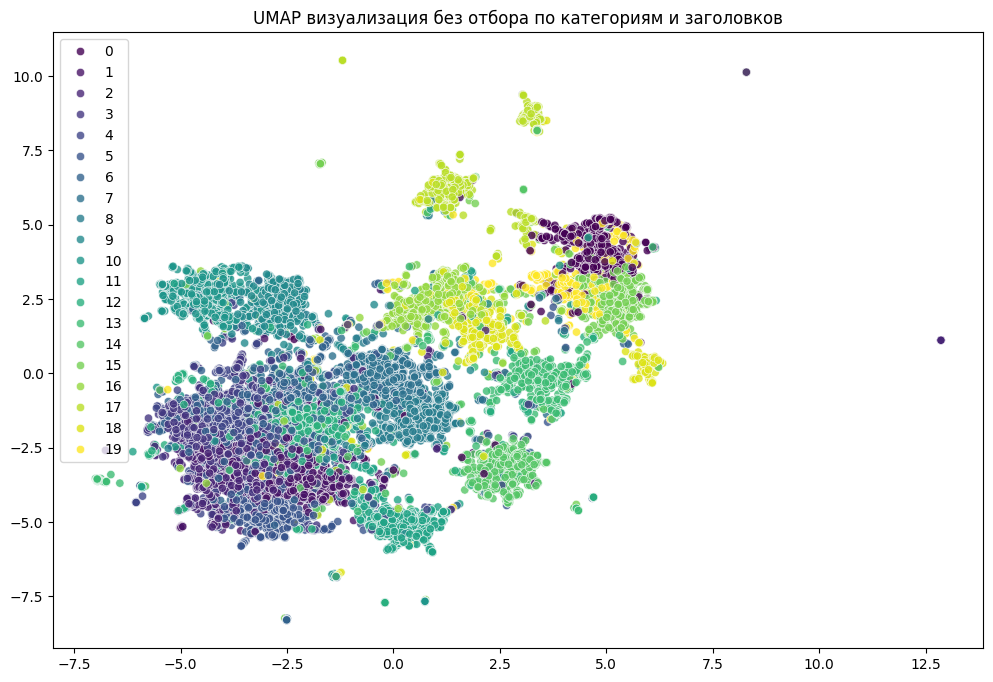

In [ ]:
# Создание графика
plt.figure(figsize=(12, 8))
sns.scatterplot(x=umap_result_1[:, 0], y=umap_result_1[:, 1], hue=newsgroups_data.target, palette='viridis', legend='full', alpha=0.8)
plt.title('UMAP визуализация без отбора по категориям и заголовков')
plt.show()

c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


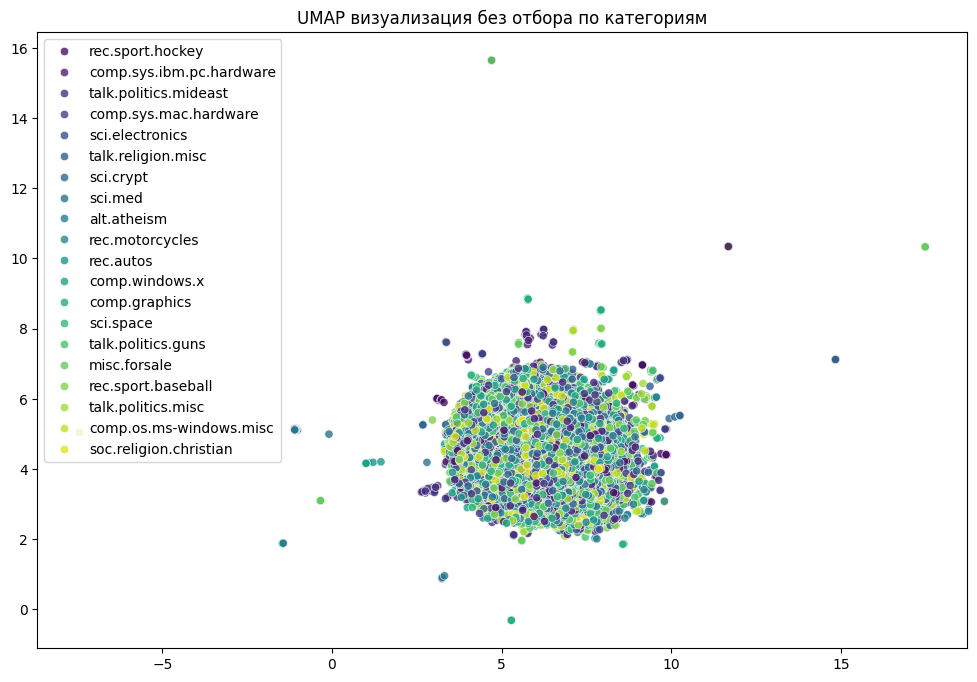

In [ ]:
# Применение UMAP
umap = UMAP(n_components=2, random_state=42)
umap_result_3 = umap.fit_transform(features_3.toarray())

# Создание графика
plt.figure(figsize=(12, 8))
sns.scatterplot(x=umap_result_3[:, 0], y=umap_result_3[:, 1], hue=category_labels_3, palette='viridis', legend='full', alpha=0.8)
plt.title('UMAP визуализация без отбора по категориям')
plt.show()

c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


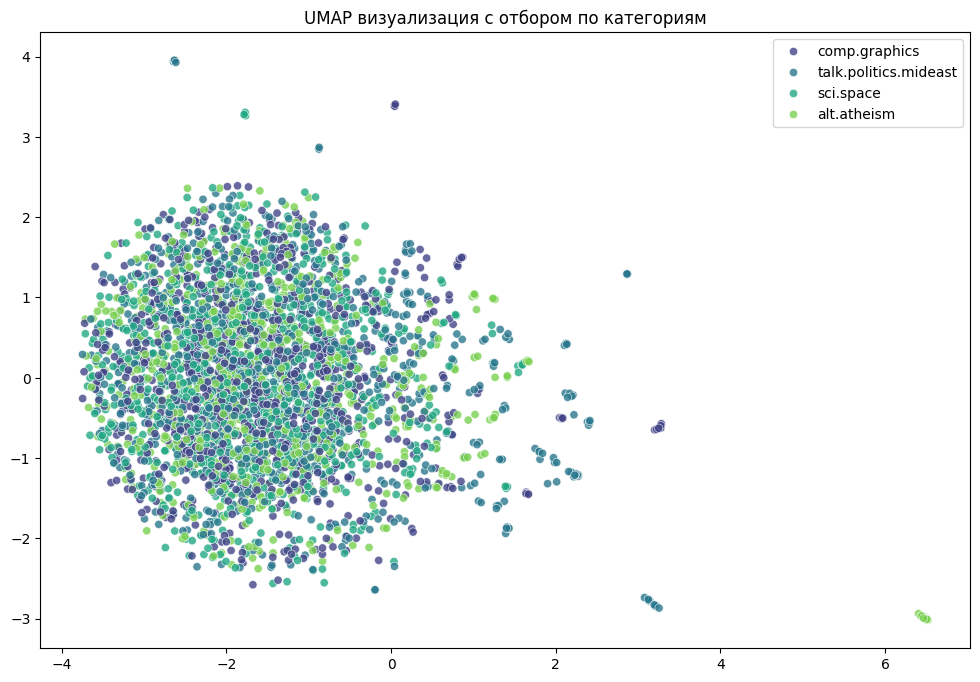

In [ ]:
# Применение UMAP
umap = UMAP(n_components=2, random_state=42)
umap_result_4 = umap.fit_transform(features_4.toarray())

# Создание графика
plt.figure(figsize=(12, 8))
sns.scatterplot(x=umap_result_4[:, 0], y=umap_result_4[:, 1], hue=category_labels_4, palette='viridis', legend='full', alpha=0.8)
plt.title('UMAP визуализация с отбором по категориям')
plt.show()

**4. После понижения размерности данных используйте любой метод машинного обучения для классификации новостей по темам.**

In [ ]:
# Разделение данных на тренировочную и тестовую выборки
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_1, newsgroups_data.target, test_size=0.2, random_state=42)
X_train_pca_1, X_test_pca_1, y_train_pca_1, y_test_pca_1 = train_test_split(pca_result_1, newsgroups_data.target, test_size=0.2, random_state=42)
X_train_tsne_1, X_test_tsne_1, y_train_tsne_1, y_test_tsne_1 = train_test_split(tsne_result_1, newsgroups_data.target, test_size=0.2, random_state=42)
X_train_umap_1, X_test_umap_1, y_train_umap_1, y_test_umap_1 = train_test_split(umap_result_1, newsgroups_data.target, test_size=0.2, random_state=42)

# Получение размеров данных
def get_shape(X_1):
    if hasattr(X_1, 'shape'):
        # Размер первой размерности (количество примеров)
        return X_1.shape[0]
    else:
        # Для плотных матриц
        return len(X_1)

print(f'Разделение на первом наборе без удаления заголовков и выбора категорий:')
print(f'Размер X_train: {get_shape(X_train_1)}')
print(f'Размер X_test: {get_shape(X_test_1)}')
print(f'Размер y_train: {len(y_train_1)}')
print(f'Размер y_test: {len(y_test_1)}')

print(f'Размер X_train_pca: {get_shape(X_train_pca_1)}')
print(f'Размер X_test_pca: {get_shape(X_test_pca_1)}')
print(f'Размер y_train_pca: {len(y_train_pca_1)}')
print(f'Размер y_test_pca: {len(y_test_pca_1)}')

print(f'Размер X_train_tsne: {get_shape(X_train_tsne_1)}')
print(f'Размер X_test_tsne: {get_shape(X_test_tsne_1)}')
print(f'Размер y_train_tsne: {len(y_train_tsne_1)}')
print(f'Размер y_test_tsne: {len(y_test_tsne_1)}')

print(f'Размер X_train_umap: {get_shape(X_train_umap_1)}')
print(f'Размер X_test_umap: {get_shape(X_test_umap_1)}')
print(f'Размер y_train_umap: {len(y_train_umap_1)}')
print(f'Размер y_test_umap: {len(y_test_umap_1)}')


Разделение на первом наборе без удаления заголовков и выбора категорий:
Размер X_train: 15076
Размер X_test: 3770
Размер y_train: 15076
Размер y_test: 3770
Размер X_train_pca: 15076
Размер X_test_pca: 3770
Размер y_train_pca: 15076
Размер y_test_pca: 3770
Размер X_train_tsne: 15076
Размер X_test_tsne: 3770
Размер y_train_tsne: 15076
Размер y_test_tsne: 3770
Размер X_train_umap: 15076
Размер X_test_umap: 3770
Размер y_train_umap: 15076
Размер y_test_umap: 3770


In [ ]:
# Разделение данных на тренировочную и тестовую выборки
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(features_3, newsgroups_data_3.target, test_size=0.2, random_state=42)
X_train_pca_3, X_test_pca_3, y_train_pca_3, y_test_pca_3 = train_test_split(pca_result_3, newsgroups_data_3.target, test_size=0.2, random_state=42)
X_train_tsne_3, X_test_tsne_3, y_train_tsne_3, y_test_tsne_3 = train_test_split(tsne_result_3, newsgroups_data_3.target, test_size=0.2, random_state=42)
X_train_umap_3, X_test_umap_3, y_train_umap_3, y_test_umap_3 = train_test_split(umap_result_3, newsgroups_data_3.target, test_size=0.2, random_state=42)

# Получение размеров данных
def get_shape(X_3):
    if hasattr(X_3, 'shape'):
        # Размер первой размерности (количество примеров)
        return X_3.shape[0]
    else:
        # Для плотных матриц
        return len(X_3)

print(f'Разделение на третьем наборе без выбора категорий:')
print(f'Размер X_train: {get_shape(X_train_3)}')
print(f'Размер X_test: {get_shape(X_test_3)}')
print(f'Размер y_train: {len(y_train_3)}')
print(f'Размер y_test: {len(y_test_3)}')

print(f'Размер X_train_pca: {get_shape(X_train_pca_3)}')
print(f'Размер X_test_pca: {get_shape(X_test_pca_3)}')
print(f'Размер y_train_pca: {len(y_train_pca_3)}')
print(f'Размер y_test_pca: {len(y_test_pca_3)}')

print(f'Размер X_train_tsne: {get_shape(X_train_tsne_3)}')
print(f'Размер X_test_tsne: {get_shape(X_test_tsne_3)}')
print(f'Размер y_train_tsne: {len(y_train_tsne_3)}')
print(f'Размер y_test_tsne: {len(y_test_tsne_3)}')

print(f'Размер X_train_umap: {get_shape(X_train_umap_3)}')
print(f'Размер X_test_umap: {get_shape(X_test_umap_3)}')
print(f'Размер y_train_umap: {len(y_train_umap_3)}')
print(f'Размер y_test_umap: {len(y_test_umap_3)}')


Разделение на третьем наборе без выбора категорий:
Размер X_train: 15076
Размер X_test: 3770
Размер y_train: 15076
Размер y_test: 3770
Размер X_train_pca: 15076
Размер X_test_pca: 3770
Размер y_train_pca: 15076
Размер y_test_pca: 3770
Размер X_train_tsne: 15076
Размер X_test_tsne: 3770
Размер y_train_tsne: 15076
Размер y_test_tsne: 3770
Размер X_train_umap: 15076
Размер X_test_umap: 3770
Размер y_train_umap: 15076
Размер y_test_umap: 3770


In [ ]:
# Разделение данных на тренировочную и тестовую выборки
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(features_4, newsgroups_data_4.target, test_size=0.2, random_state=42)
X_train_pca_4, X_test_pca_4, y_train_pca_4, y_test_pca_4 = train_test_split(pca_result_4, newsgroups_data_4.target, test_size=0.2, random_state=42)
X_train_tsne_4, X_test_tsne_4, y_train_tsne_4, y_test_tsne_4 = train_test_split(tsne_result_4, newsgroups_data_4.target, test_size=0.2, random_state=42)
X_train_umap_4, X_test_umap_4, y_train_umap_4, y_test_umap_4 = train_test_split(umap_result_4, newsgroups_data_4.target, test_size=0.2, random_state=42)

# Получение размеров данных
def get_shape(X_4):
    if hasattr(X_4, 'shape'):
        # Размер первой размерности (количество примеров)
        return X_4.shape[0]
    else:
        # Для плотных матриц
        return len(X_4)

print(f'Разделение на четвёртом наборе с выбором категорий:')
print(f'Размер X_train: {get_shape(X_train_4)}')
print(f'Размер X_test: {get_shape(X_test_4)}')
print(f'Размер y_train: {len(y_train_4)}')
print(f'Размер y_test: {len(y_test_4)}')

print(f'Размер X_train_pca: {get_shape(X_train_pca_4)}')
print(f'Размер X_test_pca: {get_shape(X_test_pca_4)}')
print(f'Размер y_train_pca: {len(y_train_pca_4)}')
print(f'Размер y_test_pca: {len(y_test_pca_4)}')

print(f'Размер X_train_tsne: {get_shape(X_train_tsne_4)}')
print(f'Размер X_test_tsne: {get_shape(X_test_tsne_4)}')
print(f'Размер y_train_tsne: {len(y_train_tsne_4)}')
print(f'Размер y_test_tsne: {len(y_test_tsne_4)}')

print(f'Размер X_train_umap: {get_shape(X_train_umap_4)}')
print(f'Размер X_test_umap: {get_shape(X_test_umap_4)}')
print(f'Размер y_train_umap: {len(y_train_umap_4)}')
print(f'Размер y_test_umap: {len(y_test_umap_4)}')


Разделение на четвёртом наборе с выбором категорий:
Размер X_train: 2959
Размер X_test: 740
Размер y_train: 2959
Размер y_test: 740
Размер X_train_pca: 2959
Размер X_test_pca: 740
Размер y_train_pca: 2959
Размер y_test_pca: 740
Размер X_train_tsne: 2959
Размер X_test_tsne: 740
Размер y_train_tsne: 2959
Размер y_test_tsne: 740
Размер X_train_umap: 2959
Размер X_test_umap: 740
Размер y_train_umap: 2959
Размер y_test_umap: 740


**5. Сравните качество классификации для каждого метода понижения размерности. Используйте метрики точности и F1-меру.**

In [ ]:
# Функция для разделения данных
def split_data(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Функция для получения размеров данных
def get_shape(X):
    if hasattr(X, 'shape'):
        # Размер первой размерности (количество примеров)
        return X.shape[0]
    else:
        # Для плотных матриц
        return len(X)

# Функция для обучения модели и оценки метрик
def evaluate_model(X_train, X_test, y_train, y_test):
    classifier = LogisticRegression(max_iter=1000, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

In [ ]:
# Оценка модели для каждого набора данных
results = {}

print('\n')
# Без понижения размерности
results['Оригинальный без удаления заколовков и выбора категорий'] = evaluate_model(X_train_1, X_test_1, y_train_1, y_test_1)

# PCA
results['pca оригинального'] = evaluate_model(X_train_pca_1, X_test_pca_1, y_train_pca_1, y_test_pca_1)

# t-SNE
results['tsne оригинального'] = evaluate_model(X_train_tsne_1, X_test_tsne_1, y_train_tsne_1, y_test_tsne_1)

# UMAP
results['umap оригинального'] = evaluate_model(X_train_umap_1, X_test_umap_1, y_train_umap_1, y_test_umap_1)

# # Без понижения размерности для третьего набора
results['Третий с удалением заголовков'] = evaluate_model(X_train_3, X_test_3, y_train_3, y_test_3)

# PCA
results['pca_3 третьего'] = evaluate_model(X_train_pca_3, X_test_pca_3, y_train_pca_3, y_test_pca_3)

# t-SNE
results['tsne_3 третьего'] = evaluate_model(X_train_tsne_3, X_test_tsne_3, y_train_tsne_3, y_test_tsne_3)

# UMAP
results['umap_3 третьего'] = evaluate_model(X_train_umap_3, X_test_umap_3, y_train_umap_3, y_test_umap_3)

# # Без понижения размерности для четвёртого набора
results['Четвёртый с удалением заголовков и отбором по категориям'] = evaluate_model(X_train_4, X_test_4, y_train_4, y_test_4)

# PCA
results['pca_4 четвёртого'] = evaluate_model(X_train_pca_4, X_test_pca_4, y_train_pca_4, y_test_pca_4)

# t-SNE
results['tsne_4 четвёртого'] = evaluate_model(X_train_tsne_4, X_test_tsne_4, y_train_tsne_4, y_test_tsne_4)

# UMAP
results['umap_4 четвёртого'] = evaluate_model(X_train_umap_4, X_test_umap_4, y_train_umap_4, y_test_umap_4)

# Печать результатов
for key, (accuracy, f1) in results.items():
    print(f'{key} - Точность: {accuracy:.2f}, F1-score: {f1:.2f}')

c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Оригинальный без удаления заколовков и выбора категорий - Точность: 0.89, F1-score: 0.89
pca оригинального - Точность: 0.25, F1-score: 0.18
tsne оригинального - Точность: 0.63, F1-score: 0.61
umap оригинального - Точность: 0.66, F1-score: 0.63
Третий с удалением заголовков - Точность: 0.71, F1-score: 0.71
pca_3 третьего - Точность: 0.19, F1-score: 0.12
tsne_3 третьего - Точность: 0.10, F1-score: 0.06
umap_3 третьего - Точность: 0.05, F1-score: 0.02
Четвёртый с удалением заголовков и отбором по категориям - Точность: 0.87, F1-score: 0.87
pca_4 четвёртого - Точность: 0.66, F1-score: 0.66
tsne_4 четвёртого - Точность: 0.32, F1-score: 0.28
umap_4 четвёртого - Точность: 0.28, F1-score: 0.20


**6. Визуализируйте двумерное представление данных для каждого метода понижения размерности, чтобы оценить, как алгоритмы справляются с сепарацией классов.**

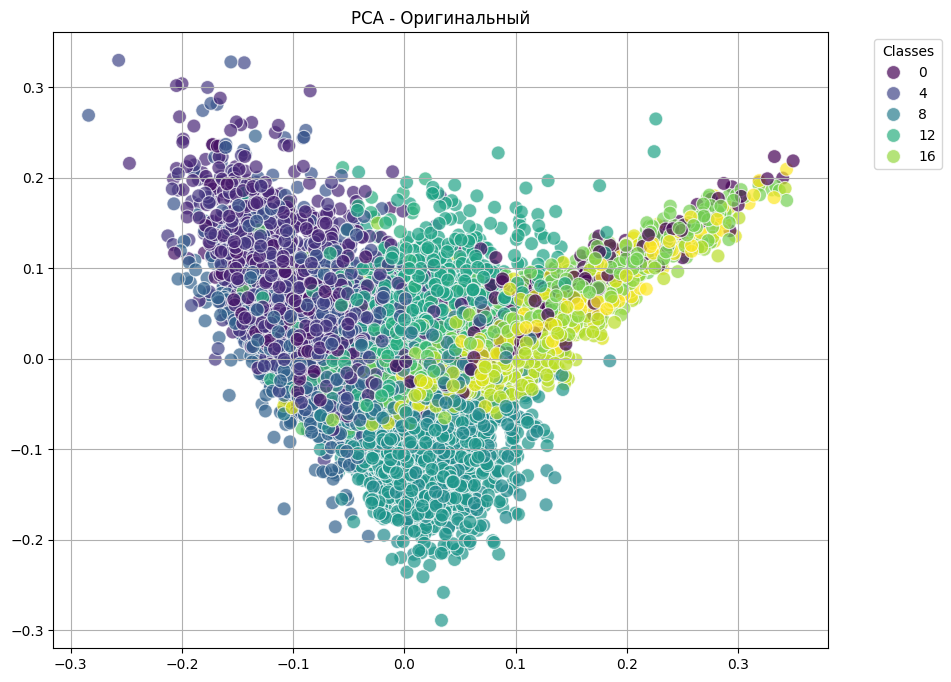

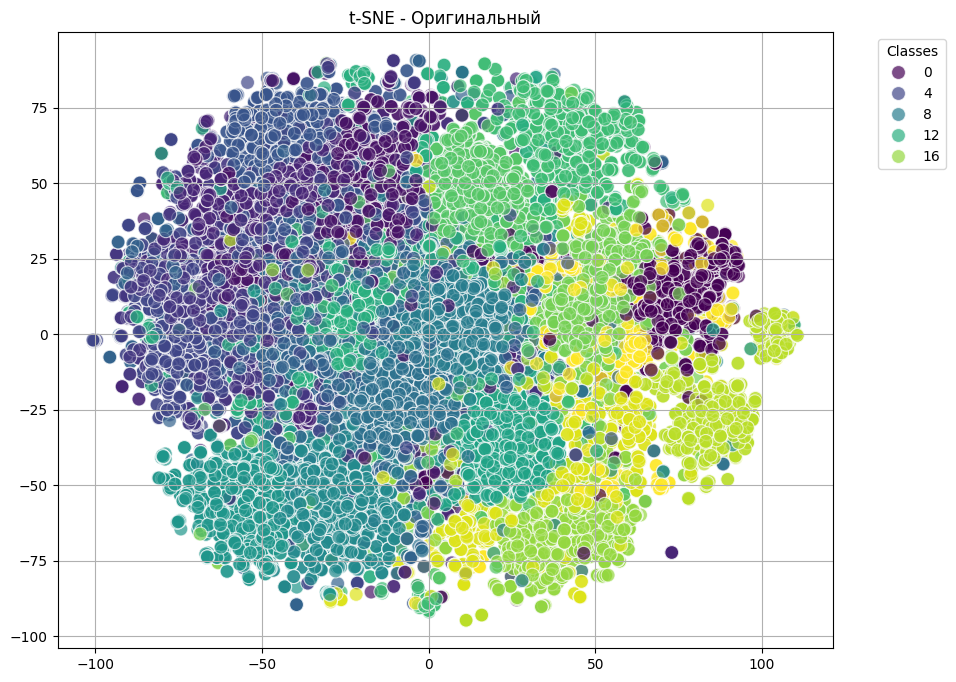

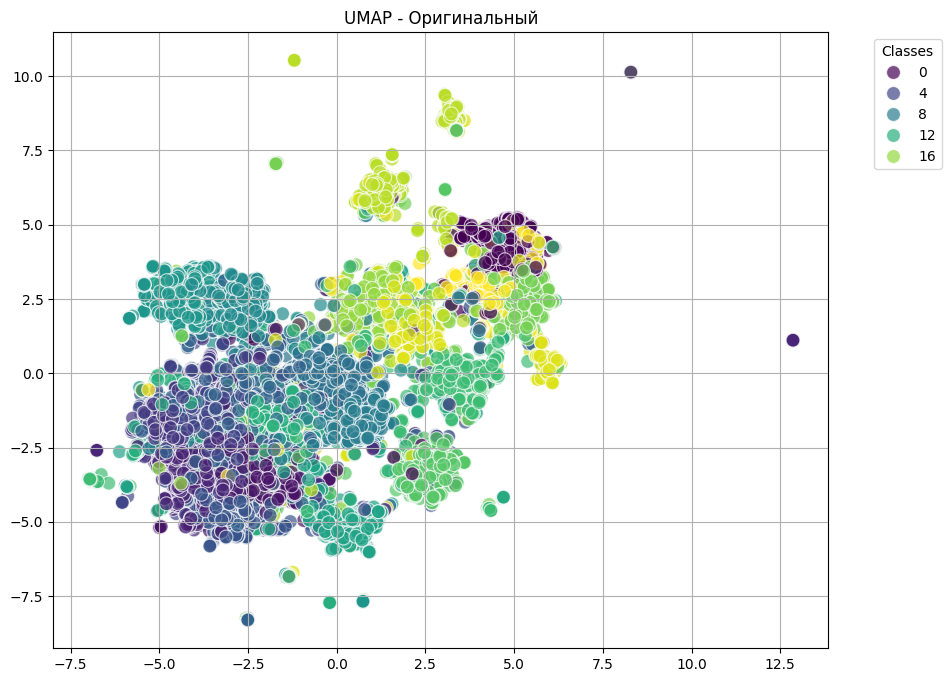

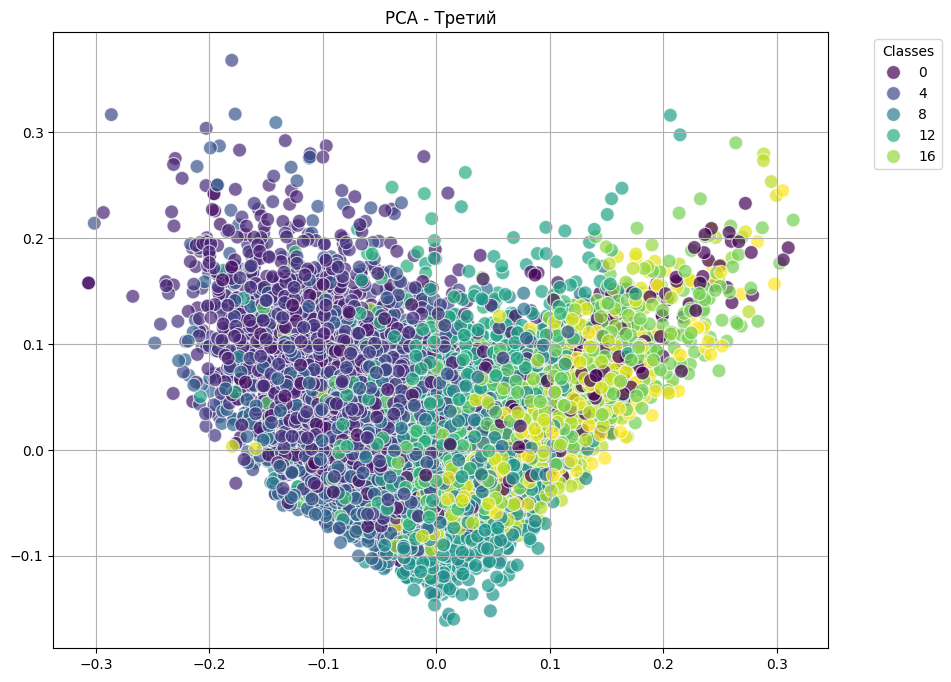

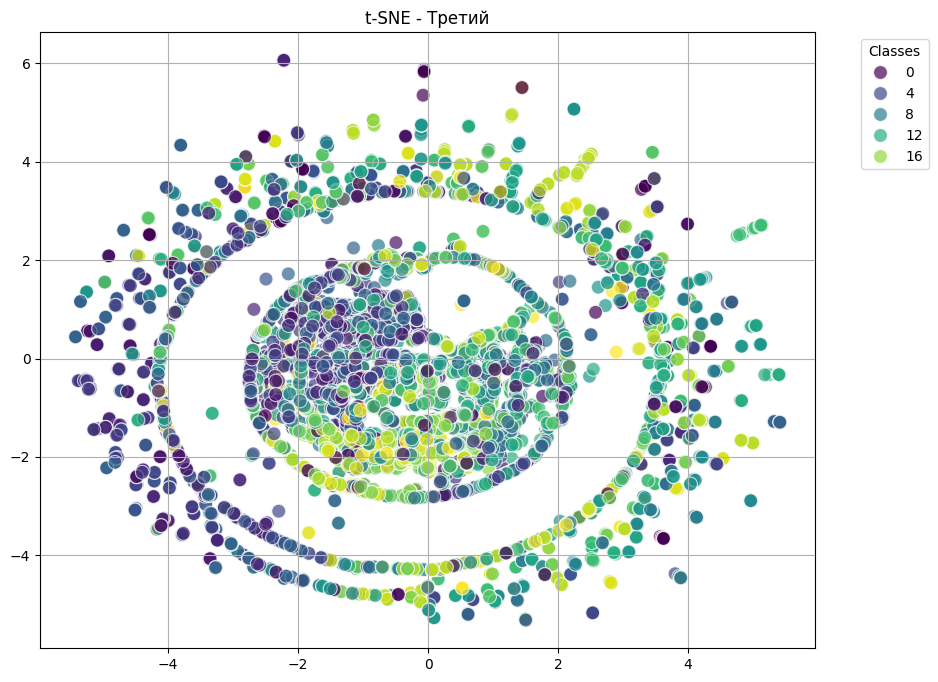

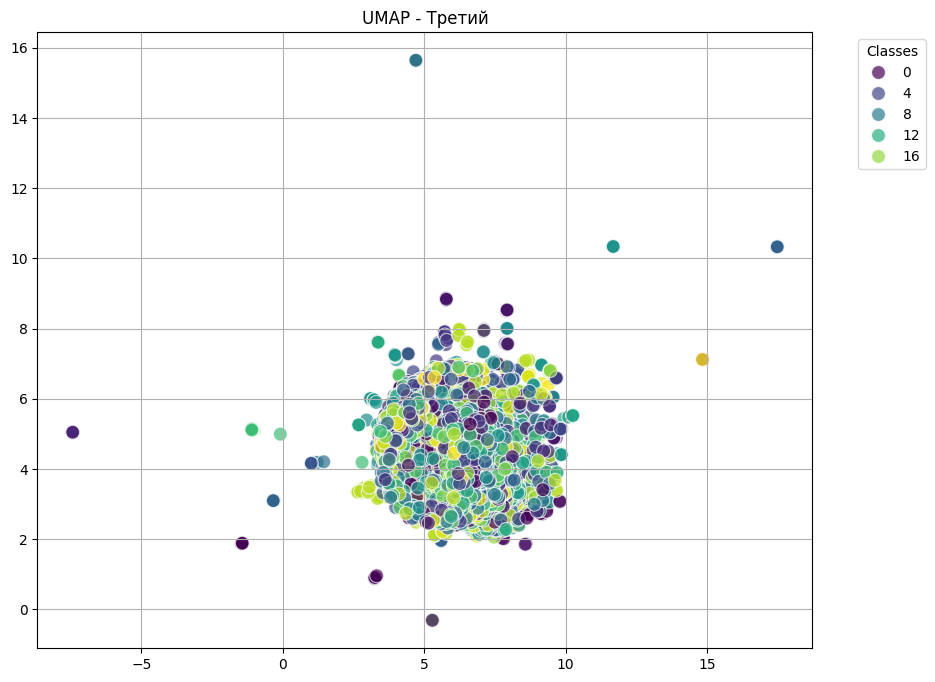

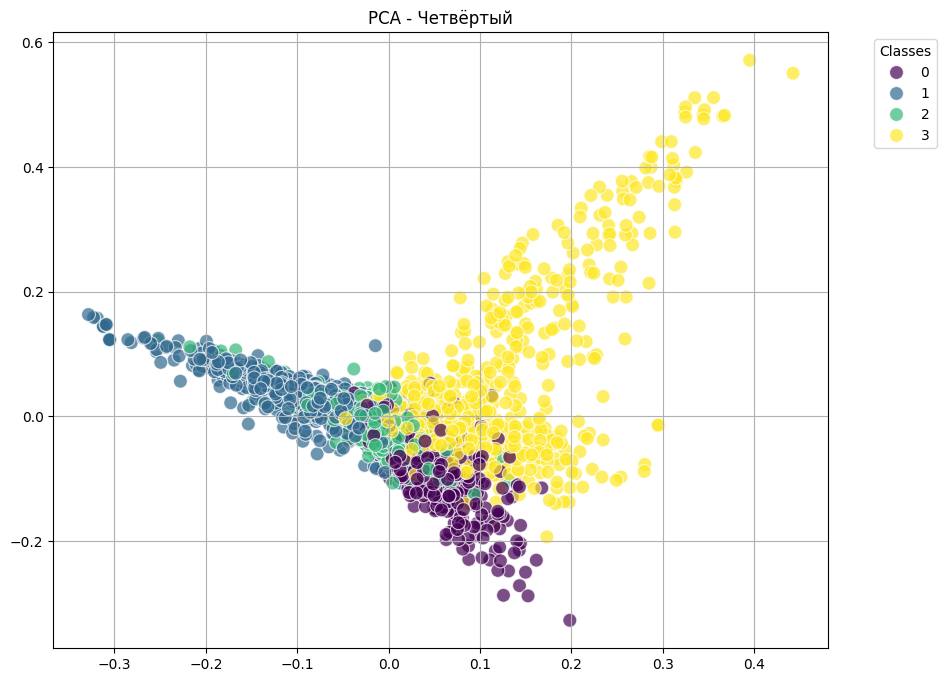

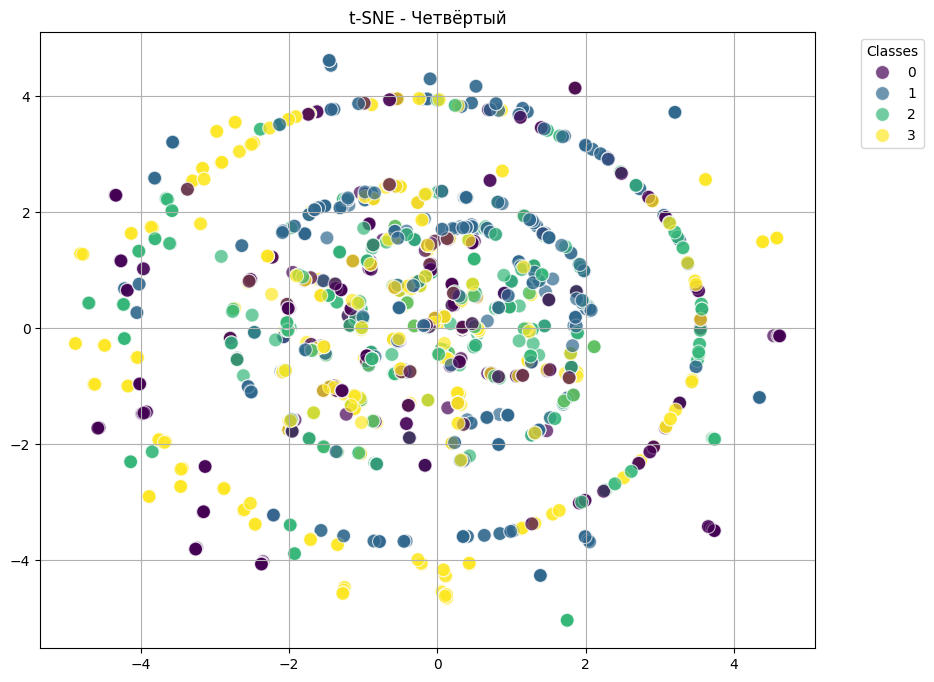

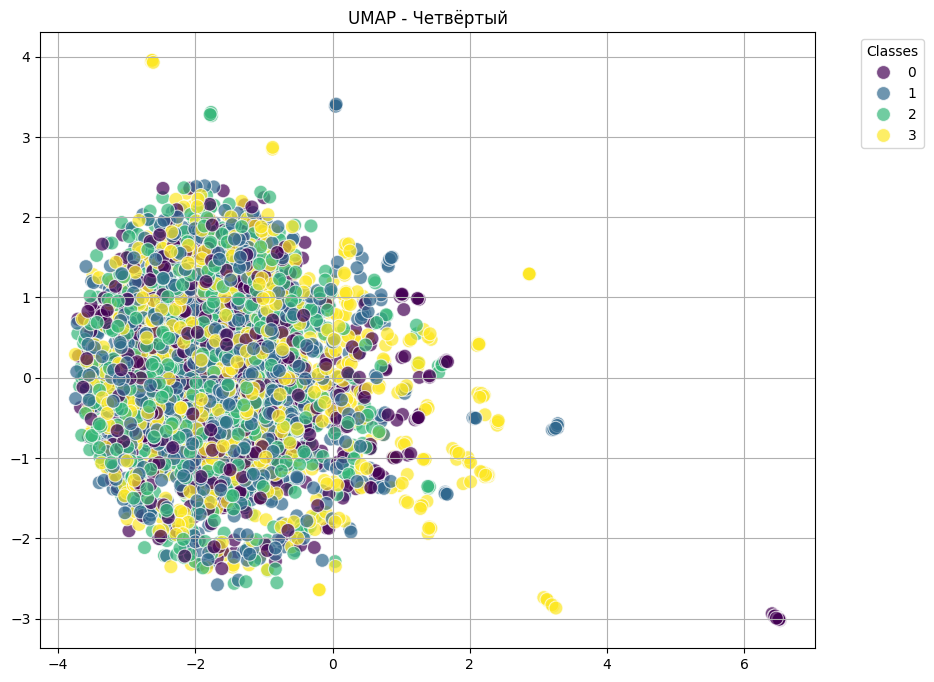

In [ ]:
# Функция для визуализации данных
def plot_2d_representation(X, y, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=100, alpha=0.7)
    plt.title(title)
    plt.legend(title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

# Визуализация для каждого метода
# 1. PCA
plot_2d_representation(pca_result_1, newsgroups_data.target, 'PCA - Оригинальный')

# 2. t-SNE
plot_2d_representation(tsne_result_1, newsgroups_data.target, 't-SNE - Оригинальный')

# 3. UMAP
plot_2d_representation(umap_result_1, newsgroups_data.target, 'UMAP - Оригинальный')

# Аналогично для третьего набора
plot_2d_representation(pca_result_3, newsgroups_data_3.target, 'PCA - Третий')
plot_2d_representation(tsne_result_3, newsgroups_data_3.target, 't-SNE - Третий')
plot_2d_representation(umap_result_3, newsgroups_data_3.target, 'UMAP - Третий')

# Аналогично для четвёртого набора
plot_2d_representation(pca_result_4, newsgroups_data_4.target, 'PCA - Четвёртый')
plot_2d_representation(tsne_result_4, newsgroups_data_4.target, 't-SNE - Четвёртый')
plot_2d_representation(umap_result_4, newsgroups_data_4.target, 'UMAP - Четвёртый')

**7. Напишите отчёт, в котором обсудите, какой метод понижения размерности оказал наиболее значительное влияние на качество классификации и почему.**

В данной работе проведена оценка нескольких методов понижения размерности (PCA, t-SNE и UMAP) в контексте их влияния на качество классификации различных наборов данных. Для оценки эффективности каждого метода были использованы метрики точности (Accuracy) и F1-score. Результаты показывают, как каждый метод справляется с задачей классификации, и позволяют сделать выводы о их применимости.

Оригинальный без удаления заколовков и выбора категорий:

- Точность: 0.89, F1-score: 0.89
- pca оригинального - Точность: 0.25, F1-score: 0.18
- tsne оригинального - Точность: 0.63, F1-score: 0.61
- umap оригинального - Точность: 0.66, F1-score: 0.63

Третий с удалением заголовков:

- Точность: 0.71, F1-score: 0.71
- pca_3 третьего - Точность: 0.19, F1-score: 0.12
- tsne_3 третьего - Точность: 0.10, F1-score: 0.06
- umap_3 третьего - Точность: 0.05, F1-score: 0.02

Четвёртый с удалением заголовков и отбором по категориям:

- Точность: 0.87, F1-score: 0.87
- pca_4 четвёртого - Точность: 0.66, F1-score: 0.66
- tsne_4 четвёртого - Точность: 0.32, F1-score: 0.28
- umap_4 четвёртого - Точность: 0.28, F1-score: 0.20

Без уменьшения размерности:
- Для первого и четвертого наборов данных, t-SNE и UMAP показали лучшие результаты по сравнению с PCA. В частности, t-SNE достигла точности 63% и F1-score 61% на первом наборе данных, а UMAP показала результаты 66% и 63% соответственно. Эти результаты указывают на то, что t-SNE и UMAP более эффективно справляются с задачей разделения классов по сравнению с PCA, особенно в более сложных задачах, где классы могут быть не линейно разделимыми. В то же время, для третьего набора данных, все методы понижения размерности показали значительно более низкие результаты.

Метод PCA:
PCA показала наихудшие результаты во всех наборах данных, особенно на третьем наборе, где точность составила всего 19%, а F1-score — 12%.

Метод t-SNE и UMAP:
t-SNE и UMAP продемонстрировали способность к лучшему разделению классов по сравнению с PCA, особенно в первом наборе данных. Однако на третьем наборе данных их эффективность значительно упала. UMAP, как правило, быстрее, чем t-SNE, и может сохранять глобальную структуру данных, что делает его более предпочтительным в некоторых случаях.

Вывод:
На основании проведенного анализа, можно сделать вывод, что t-SNE и UMAP являются более эффективными методами понижения размерности для задач классификации по сравнению с PCA. Однако их эффективность может зависеть от структуры данных и количества классов.